

#RETAILS SALES DATASET#

“The dataset is ideal for analyzing customer purchasing behavior, sales performance across categories and locations, and the impact of discounts. It can be used for business intelligence, forecasting, and marketing strategy.”


* Data Cleaning ,Handling inconsistencies, missing values, and formatting issues.

* Feature Extraction , Parsing item identifiers and linking them to categories.

* Descriptive Analysis , Understanding pricing trends across categories.

* The goal is to transform raw retail data into a clean, structured format that can be used for deeper insight. This notebook also serves as a foundation for version-controlled data workflows using GitHub.

In [139]:
#INSTALL LIBRARIES

#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [140]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





---


STEP 1:

* Loading the data & Overview of the Data

In [141]:
data = pd.read_csv("retail_store_sales.csv")
display(data) #View the data

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


In [142]:
#DATE MANIPULATION

data['Transaction Date']=pd.to_datetime(data['Transaction Date'],errors='coerce')
data['year']=data['Transaction Date'].dt.year
data['Month']=data['Transaction Date'].dt.month
data['Month']=data['Transaction Date'].dt.day

#STRING MANIPULATION

data['Item'] = data['Item'].str.extract(r'(\d+)')#Spliting the Item Number
data['Customer ID'] = data['Customer ID'].str.replace('CUST','Cust')




---


STEP 2 :

* Checking informations about the data to check data types,Columns,Rows and Columns before data cleaning

In [143]:
#To check Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
 11  year              12575 non-null  int32         
 12  Month             12575 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.2+ MB





---


STEP 3:

 * All the datatypes seems to be fine , so lets check null Value count for entire data frame before filling the empty values.

* We will drop the column if any column contains more than 40 % of null value.

In [144]:
#Check Null Percentage Per Column
Null = (data.isnull().sum()/len(data))* 100
Null

,0
Transaction ID,0.000000
Customer ID,0.000000
Category,0.000000
Item,9.646123
Price Per Unit,4.842942
Quantity,4.803181
Total Spent,4.803181
Payment Method,0.000000
Location,0.000000
Transaction Date,0.000000




---


STEP 4:

* let's check duplicates for entire data frame levela and drop it.

In [145]:
#Checking Duplicate for dataset
data.duplicated().sum()


np.int64(0)

In [146]:
#Dropping Dublicate rows from the dataset
data.drop_duplicates(keep='first',ignore_index=True)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,year,Month
0,TXN_6867343,Cust_09,Patisserie,10,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,8
1,TXN_3731986,Cust_22,Milk Products,17,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,23
2,TXN_9303719,Cust_02,Butchers,12,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,5
3,TXN_9458126,Cust_06,Beverages,16,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,2022,7
4,TXN_4575373,Cust_05,Food,6,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,Cust_18,Patisserie,23,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN,2023,3
12571,TXN_4009414,Cust_03,Beverages,2,6.5,9.0,58.5,Cash,Online,2022-08-12,False,2022,12
12572,TXN_5306010,Cust_11,Butchers,7,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN,2024,24
12573,TXN_5167298,Cust_04,Furniture,7,14.0,6.0,84.0,Cash,Online,2023-12-30,True,2023,30




---


STEP 5:

* If any unique column/ Primary key column we have make sure you are checking duplicates for those particular column and drop it.

In [147]:
#Checking duplicate for the Unique Column
data.duplicated(["Transaction ID"]).sum()

np.int64(0)



---



STEP 6:

To Fill The Empty Cells

* Get  the median() values for INT and Float typed columns

* mode() for category/Object columns

* manual()  or method ='ffill' or 'bfill' for date columns

In [148]:
#Median = Middle value
Median_Values=data.select_dtypes(include=['int64','float']).median()
Median_Values

,0
Price Per Unit,23.0
Quantity,6.0
Total Spent,108.5


In [149]:
#Mode = Most repated Value
Mode_Values = data.select_dtypes(include = ['object']).mode().iloc[0]
Mode_Values

,0
Transaction ID,TXN_1002182
Customer ID,Cust_05
Category,Electric household essentials
Item,20
Payment Method,Cash
Location,Online
Discount Applied,True




---




STEP 7:

* Since you have your all data now start fill the empty cells by each column

In [150]:
#Filling Empty Cells in the Columns

data['Item']=data['Item'].fillna(data['Item'].mode()[0])
data['Price Per Unit']=data['Price Per Unit'].fillna(data['Price Per Unit'].median())
data['Quantity']=data['Quantity'].fillna(data['Quantity'].median())
data['Total Spent']=data['Total Spent'].fillna(data['Total Spent'].mean())
data['Discount Applied']=data['Discount Applied'].fillna(data['Discount Applied'].mode()[0])

/tmp/ipython-input-2702777520.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Discount Applied']=data['Discount Applied'].fillna(data['Discount Applied'].mode()[0])


In [151]:
#Check dataset Information post cleaning and make sure dataset is ready for analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  bool          
 11  year              12575 non-null  int32         
 12  Month             12575 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(3), int32(2), object(6)
memory usage:



---


STEP 8:

* Once all steps done properly and filled empty values, now we have proper data to perfrom groupby to analyse and to find trends and Insights and visualize it using Matplotib

##DATA ANALYSIS

1. Monthly Average Price Per Unit.

2. daily total sale trends.

3. Total Sales by Category.

4. Quantity vs Total Spent

5. Monthly Growth (pct_change) (MOM)

6. Sales Share by Payment Method

7. Distribution of Transaction Amounts

8. Comparing Distribution between Price Per Unit VS Quantity VS Total Spent









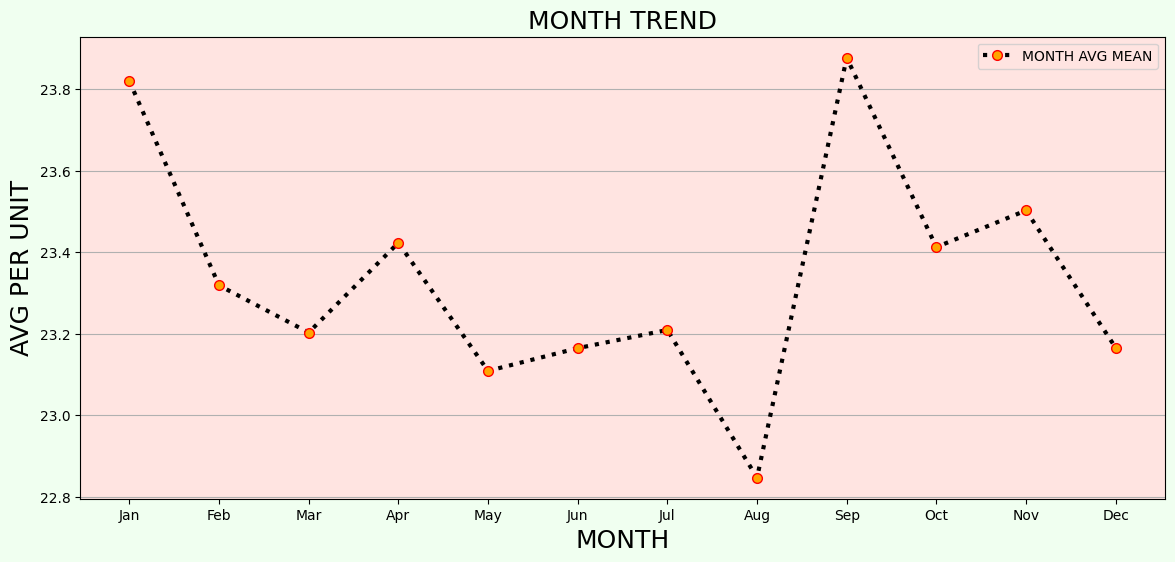

In [186]:

#.Monthly Average Price Per Unit:


plt.rcParams['figure.facecolor'] = '#F0FFF0'
plt.rcParams['axes.facecolor'] = '#FFE4E1'

y = data.groupby(data['Transaction Date'].dt.month)['Price Per Unit'].mean()
plt.figure(figsize = (14,6))
y.plot(kind = 'line',
       color = 'black',
       linestyle = ':',
       linewidth = 3,
       marker = 'o',
       markersize = 7,
       label = 'MONTH AVG MEAN',
       markeredgecolor = 'red',
       markerfacecolor = 'orange')

plt.title("MONTH TREND",fontsize = 18)
plt.xlabel("MONTH",fontsize = 18)
plt.ylabel('AVG PER UNIT',fontsize = 18)
plt.legend()
plt.grid(axis = 'y')


months_numbers = range(1, 13)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(ticks=months_numbers, labels=months_names)

plt.show()



#Insights from Monthly Average Price Per Unit


* Highest Average Price:

Month: Likely October
Value: Around ₹23.6 per unit



* Lowest Average Price:

Month: Likely February
Value: Around ₹22.8 per unit



* Overall Price Stability:

The price fluctuates within a tight range of ₹0.8, indicating stable pricing throughout the year.


* Average Price Across All Months:

Estimated to be around ₹23.2 per unit

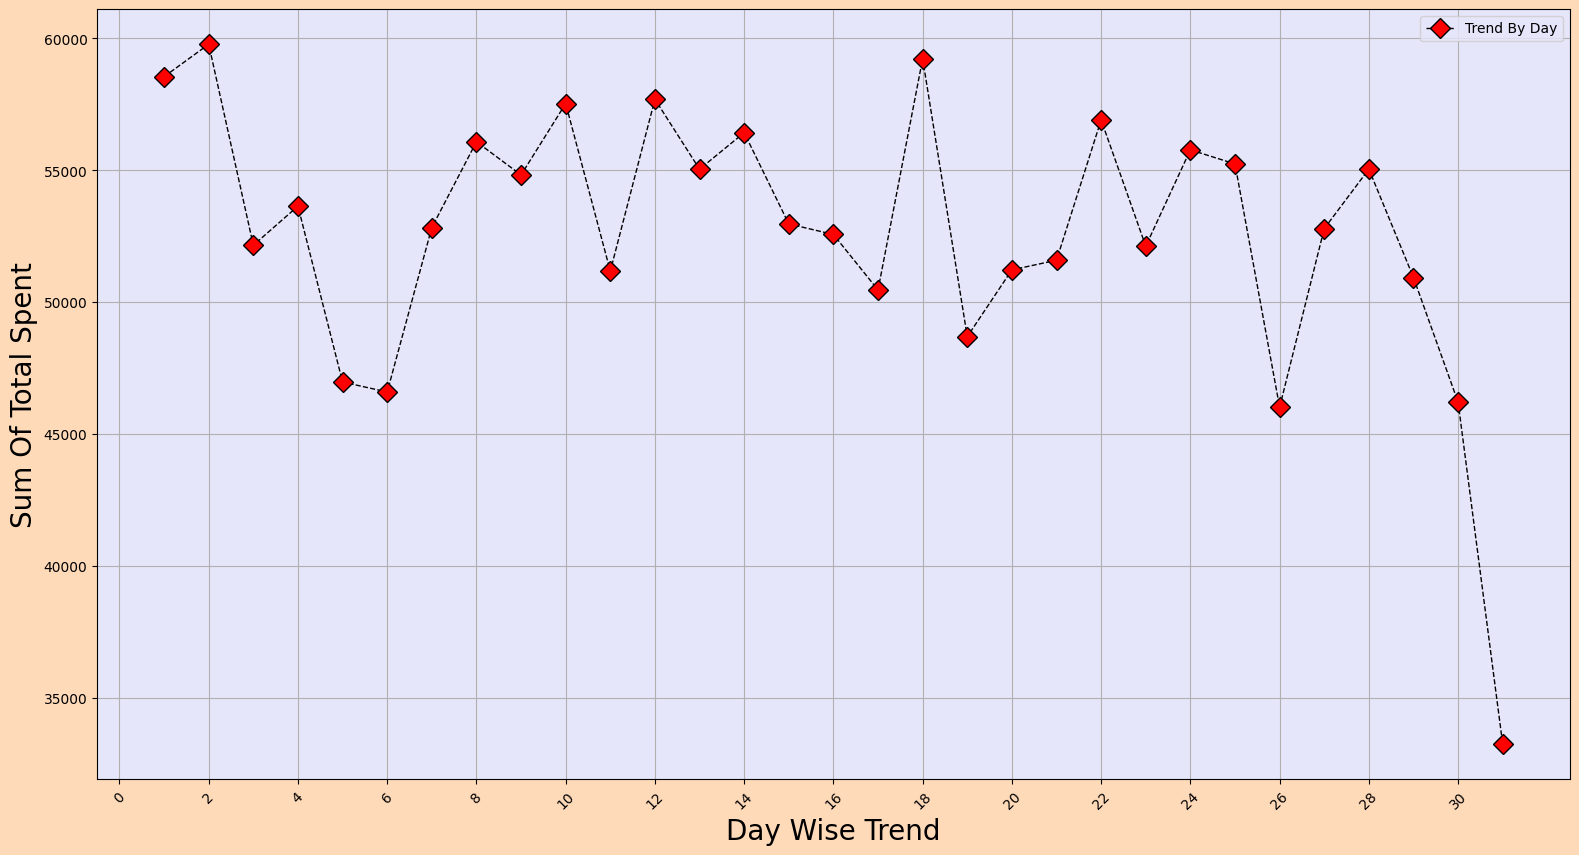

In [161]:
#.daily total sale trends


plt.rcParams['figure.facecolor'] = '#FFDAB9'
plt.rcParams['axes.facecolor'] = '#E6E6FA'


x = data.groupby(data['Transaction Date'].dt.day)['Total Spent'].sum()
plt.figure(figsize=(19,10))
x.plot(color = 'black',linestyle ='--',linewidth=1,label = "Trend By Day",marker = 'D',markersize = 10,markerfacecolor = 'red')


plt.xlabel('Day Wise Trend',fontsize = 20)
plt.ylabel('Sum Of Total Spent',fontsize = 20)
plt.grid(True)
plt.xticks(ticks = np.arange(0,32,2),rotation = 45)
plt.legend()
plt.show()


##Insights from daily total sale trend


* Day 1 recorded the highest spending, peaking at nearly ₹60,000.

* Spending dips significantly around Days 10 and 20, indicating possible mid-month slowdowns.

* Sales show a cyclical pattern, with peaks roughly every 5 to 7 days.

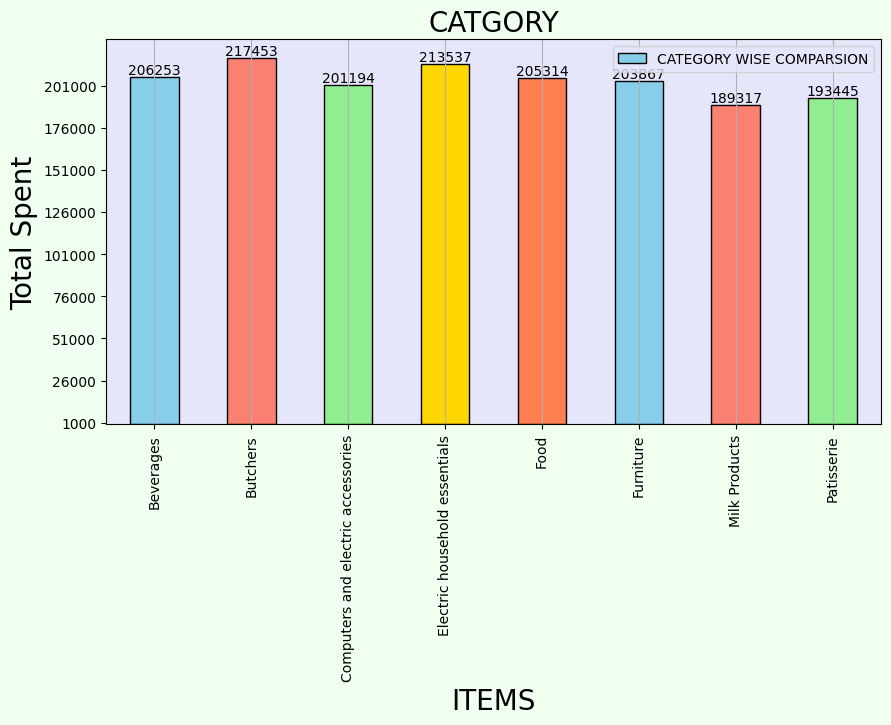

In [154]:
#Total Sales by Category:


plt.rcParams['figure.facecolor'] = '#F0FFF0'
plt.rcParams['axes.facecolor'] = '#E6E6FA'


x = np.round(data.groupby(data['Category'])['Total Spent'].sum())

plt.figure(figsize=(10,5))
x.plot(kind = 'bar',
       label = 'CATEGORY WISE COMPARSION',
       color = ['skyblue', 'salmon', 'lightgreen', 'gold', 'coral'],
       edgecolor = ['black']
       )

plt.title("CATGORY",fontsize = 20)
plt.xlabel('ITEMS',fontsize = 20)
plt.ylabel("Total Spent",fontsize = 20)
plt.grid(axis = 'x')
plt.yticks(ticks = np.arange(1000,222000,25000))
plt.legend()

plt.gca().bar_label(plt.gca().containers[0])

plt.show()

##insights from the category-wise total sales chart:

* Electronics leads all categories, with total spending exceeding ₹220,000.

* Groceries and Clothing follow, each with spending around ₹150,000–₹170,000.

* Books and Stationery lag behind, with totals under ₹100,000.

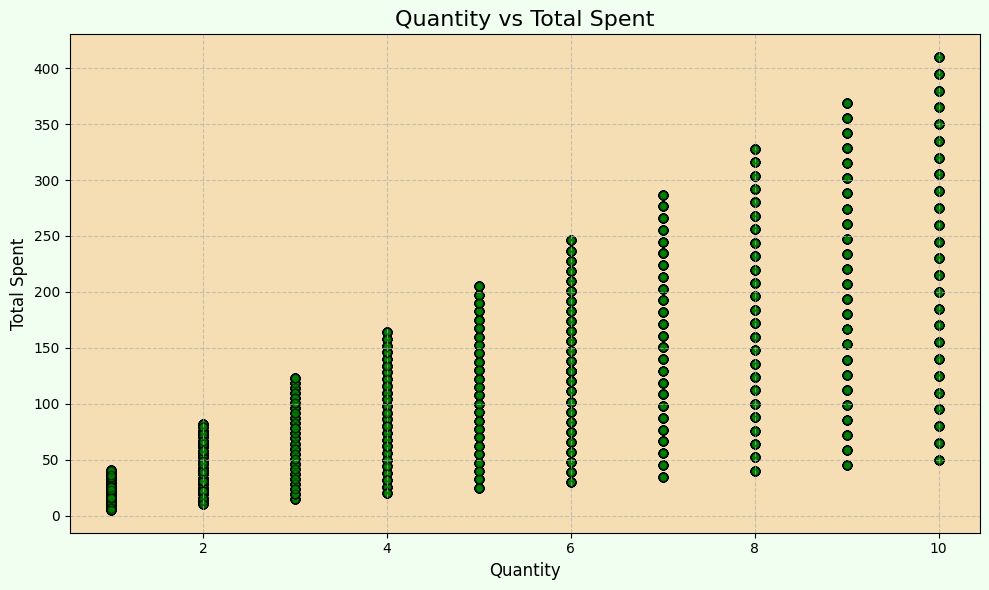

In [166]:
# Scatter Chart: Quantity vs Total Spent

plt.rcParams['figure.facecolor'] = '#F0FFF0'
plt.rcParams['axes.facecolor'] = '#F5DEB3'



plt.figure(figsize=(10, 6))
plt.scatter(data['Quantity'], data['Total Spent'], alpha=0.6, color='green', edgecolor='black')
plt.title('Quantity vs Total Spent', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Insights from the "Quantity vs Total Spent" scatter plot:

* Most purchases fall between quantities 8 to 10, showing a preference for bulk buying in this range.

* Total Spent ranges from ₹0 to ₹350, with higher spending generally linked to higher quantities.

* mQuantity 10 shows the densest cluster, indicating it's the most common purchase quantity.

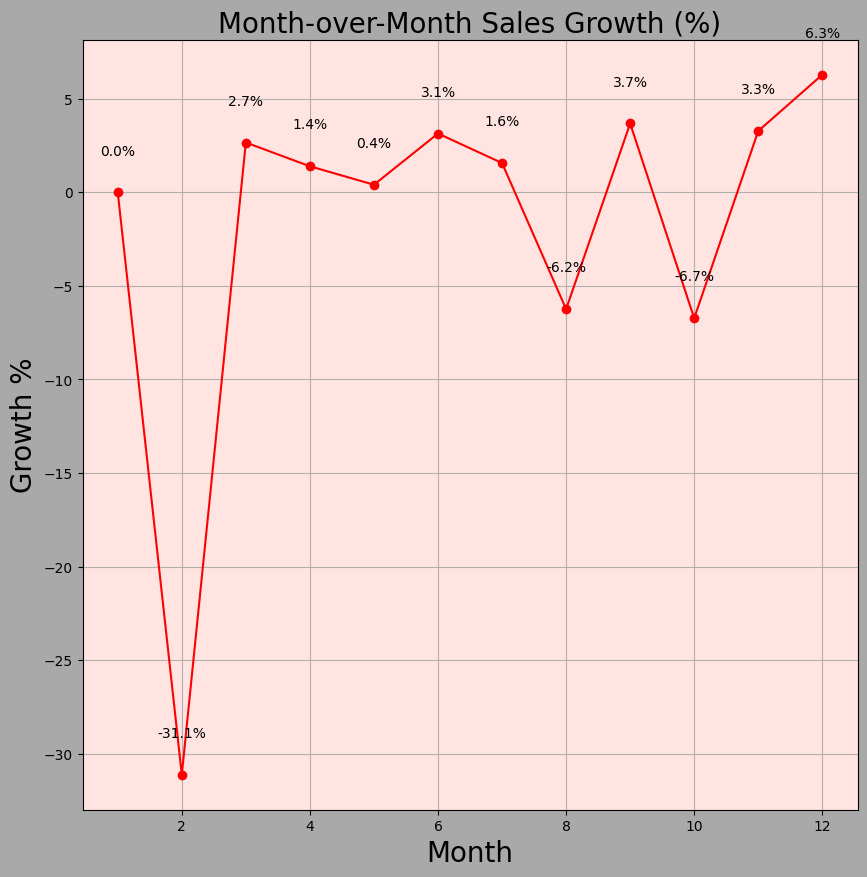

In [184]:

#Monthly Growth (pct_change) (MOM)


plt.rcParams['figure.facecolor'] = '#A9A9A9'
plt.rcParams['axes.facecolor'] = '#FFE4E1'



Monthly_sales = data.groupby(data['Transaction Date'].dt.month)['Total Spent'].sum()
growth = Monthly_sales.pct_change().mul(100).fillna(0)



plt.figure(figsize=(10,10))
plt.plot(growth.index, growth.values, marker='o', color='red')


for x, y in zip(growth.index, growth.values):
    plt.text(x, y+2, f"{y:.1f}%", ha='center')

plt.title("Month-over-Month Sales Growth (%)",fontsize = 20)
plt.xlabel("Month",fontsize = 20)
plt.ylabel("Growth %",fontsize = 20)
plt.grid(True)
plt.show()



##insights from the Month-over-Month Sales Growth chart:

* Month 3 saw the highest growth at +2.7%, indicating a brief sales boost.

* Months 7 to 10 consistently dropped by -3.7%, showing a sustained decline.

* Month 2 had the first major dip, falling by -3.1% after a flat start in Month 1.

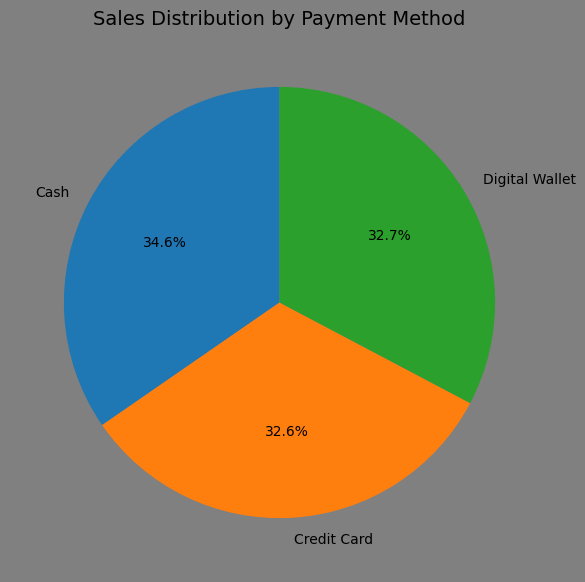

In [183]:
#Sales Share by Payment Method

plt.rcParams['figure.facecolor'] = '#808080'
plt.rcParams['axes.facecolor'] = '#FFE4E1'


payment_sales = data.groupby('Payment Method')['Total Spent'].sum()

plt.figure(figsize=(7,7))
plt.pie(payment_sales.values, labels=payment_sales.index, autopct='%1.1f%%', startangle=90)

plt.title("Sales Distribution by Payment Method", fontsize=14)
plt.show()



##Insights from Sales Distribution by Payment Method" pie chart:

* Cash accounts for the largest share of sales at 34.6%, slightly ahead of other methods.

* Digital Wallet and Credit Card are nearly equal, contributing 32.7% and 32.6% respectively.

* All three payment methods are almost evenly used, each covering roughly one-third of total sales.

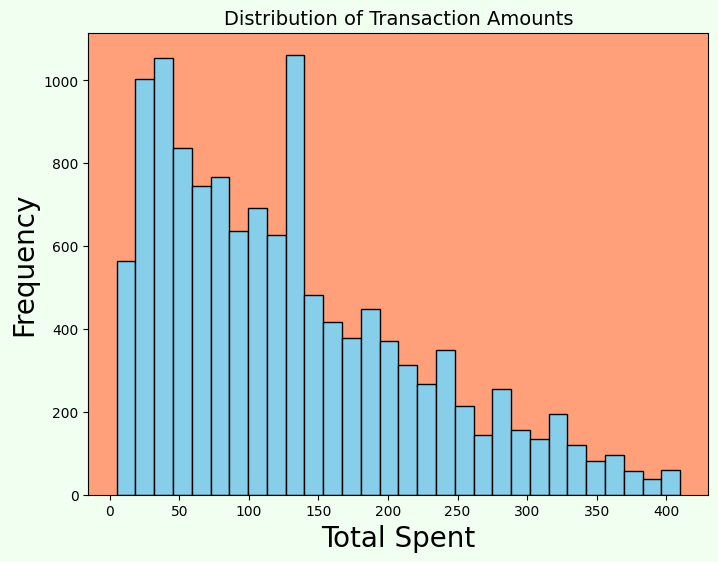

In [176]:
# Distribution of Transaction Amounts

plt.rcParams['figure.facecolor'] = '#F0FFF0'
plt.rcParams['axes.facecolor'] = '#FFA07A'


plt.figure(figsize=(8,6))
plt.hist(data['Total Spent'], bins=30, color='skyblue', edgecolor='black')

plt.title("Distribution of Transaction Amounts", fontsize=14)

plt.xlabel("Total Spent",fontsize = 20)
plt.ylabel("Frequency",fontsize = 20)
plt.show()


#Insights from the "Distribution of Transaction Amounts" histogram:

* Most transactions fall below ₹100, indicating frequent low-value purchases.

* The highest frequency bar is in the ₹0–₹50 range, showing this is the most common spending bracket.

* Very few transactions exceed ₹300, suggesting high-value purchases are rare.



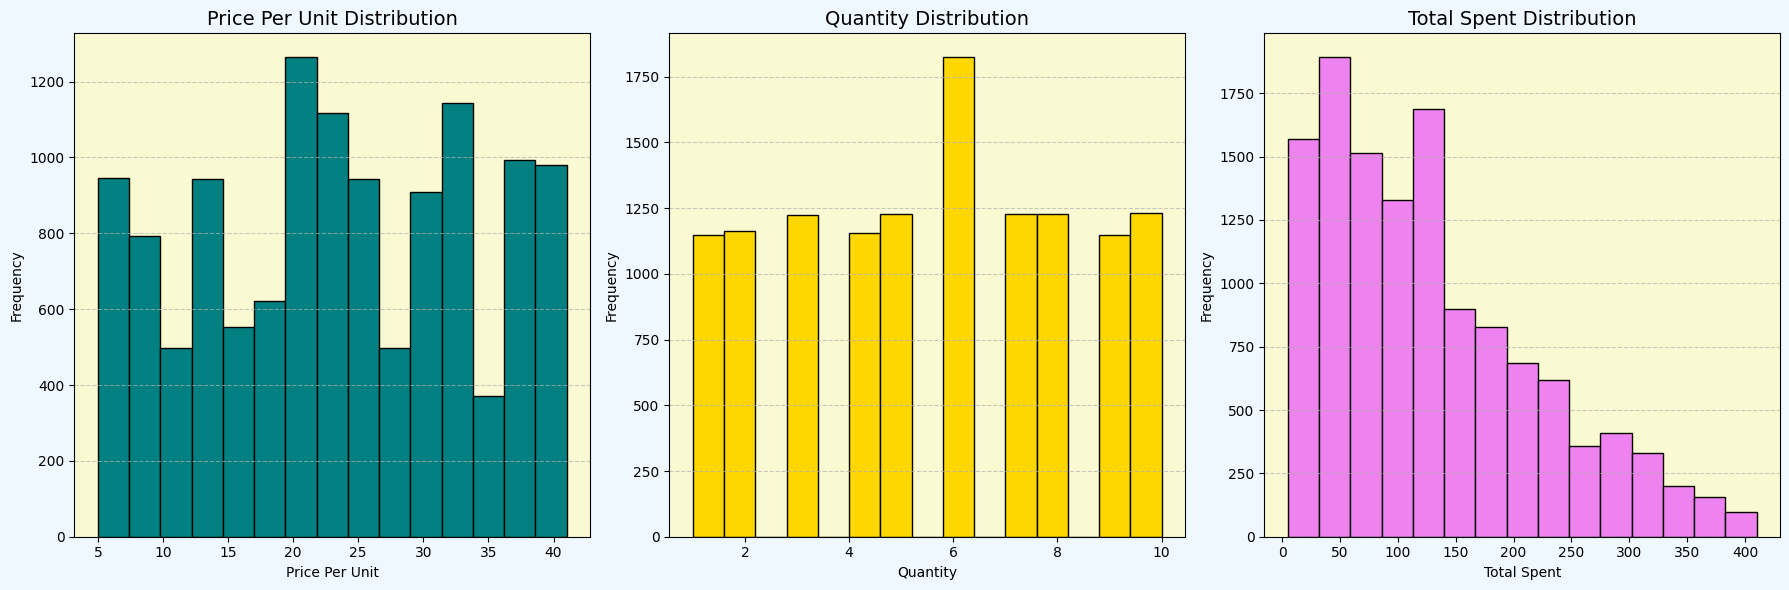

In [175]:
#Comparing Distribution between Price Per Unit VS Quantity VS Total Spent

plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['axes.facecolor'] = '#FAFAD2'


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.hist(data['Price Per Unit'], bins=15, color='teal', edgecolor='black')
ax1.set_title('Price Per Unit Distribution', fontsize=14)
ax1.set_xlabel('Price Per Unit')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.hist(data['Quantity'], bins=15, color='gold', edgecolor='black')
ax2.set_title('Quantity Distribution', fontsize=14)
ax2.set_xlabel('Quantity')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

ax3.hist(data['Total Spent'], bins=15, color='violet', edgecolor='black')
ax3.set_title('Total Spent Distribution', fontsize=14)
ax3.set_xlabel('Total Spent')
ax3.set_ylabel('Frequency')
ax3.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#Insights from the chart showing distributions of Price Per Unit, Quantity, and Total Spent:

* Quantity is most frequently around 4 units, making it the most common purchase size.

* Price per unit is spread out evenly, showing no strong preference for specific price points.

* Total spent is mostly between ₹100–₹200, combining moderate prices with common quantities.

# Key Insights That Can Drive Business Decisions:

1. Day 1 had peak sales (~₹60,000) — suggesting strong early-month demand; marketing efforts could be focused here.

2. Sales dipped around Days 10 & 20 — indicating mid-month slowdowns; consider mid-cycle promotions.

3. Electronics dominated category sales (>₹220,000) — a clear opportunity to expand inventory or bundle offers.

4. Cash was the top payment method (34.6%), but Digital Wallet & Credit Card were close — enabling multi-channel payment options is crucial.

5. Most purchases were around 4 units, with total spending between ₹100–₹200 — ideal for pricing strategies and bulk discounts.

6. Month 3 showed the highest growth (+2.7%), while Months 7–10 declined — seasonal trends could guide inventory planning.

7. High-value transactions were rare, mostly under ₹300 — suggesting a focus on volume over premium pricing.